<a href="https://colab.research.google.com/github/maraj09/thesis/blob/main/thesis_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/BitcoinHeistData.csv")
df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


# Testing


In [ ]:
df_sorted = df.sort_values(by=['day', 'year'])
df_sorted

In [ ]:
df["address"].value_counts()
df

In [ ]:
df['address_count'] = df.groupby('address')['address'].transform('count')

filtered_df = df[df["address_count"] > 1].sort_values(by=['address_count'], ascending=False)
filtered_df

In [ ]:
one_address = df.loc[df['address'] == '1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU']
one_address

In [ ]:
##### First 100 days
#
# Filter data for the first 20 days
filtered_data = one_address.loc[one_address['day'].between(1, 100)]
filtered_data
# Calculate the total occurrences per day
occurrences_per_day = filtered_data.groupby(['day', 'year']).size()
print(occurrences_per_day)
# Plot the total occurrences per day in a bar graph
occurrences_per_day.plot(kind='bar', figsize=(16,12), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Day')
plt.xlabel('Day')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()

##### 100 - 200 days

# Filter data for the first 20 days
filtered_data = one_address.loc[one_address['day'].between(100, 200)]
filtered_data
# Calculate the total occurrences per day
occurrences_per_day = filtered_data.groupby(['day', 'year']).size()

# Plot the total occurrences per day in a bar graph
occurrences_per_day.plot(kind='bar', figsize=(16,12), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Day')
plt.xlabel('Day')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()


##### 200 - 300 days

# Filter data for the first 20 days
filtered_data = one_address.loc[one_address['day'].between(200, 300)]
filtered_data
# Calculate the total occurrences per day
occurrences_per_day = filtered_data.groupby(['day', 'year']).size()

# Plot the total occurrences per day in a bar graph
occurrences_per_day.plot(kind='bar', figsize=(16,12), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Day')
plt.xlabel('Day')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()

##### 300 - 365 days
# Filter data for the first 20 days
filtered_data = one_address.loc[one_address['day'].between(300, 400)]
filtered_data
# Calculate the total occurrences per day
occurrences_per_day = filtered_data.groupby(['day', 'year']).size()

# Plot the total occurrences per day in a bar graph
occurrences_per_day.plot(kind='bar', figsize=(16,12), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Day')
plt.xlabel('Day')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()

In [ ]:
one_address['month'] = pd.to_datetime(one_address['day'], unit='D', origin='2013-01-01').dt.month

# Calculate the total occurrences per day
occurrences_per_month = one_address.groupby(['month', 'year']).size()
# Plot the total occurrences per day in a bar graph
occurrences_per_month.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Day')
plt.xlabel('Day')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()


In [ ]:
# Convert the 'day' column to a datetime object
one_address['date'] = pd.to_datetime(one_address['day'], format='%j')

# Set 'date' as the index
one_address.set_index('date', inplace=True)

# Resample the data into weeks and calculate the total occurrences per week
occurrences_per_week = one_address.resample('W-Mon').size()

# Plot the total occurrences per week in a bar graph
occurrences_per_week.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Week')
plt.xlabel('Week Start Date')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()

# Idea of Nafis


In [19]:
ransomware_address = df.loc[df["label"] != 'white']
ransomware_address

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
41408,35iCvpMMnUWcSWrYtLJLXqe9xo5CYEWRhw,2017,76,144,1.375002,8076,8073,6,5.726876e+08,montrealAPT
41409,377CY1m8W2qbQQX5HHjziimdh2faGjDeLv,2016,259,2,1.500000,2,0,2,7.449526e+07,montrealAPT
41410,377CY1m8W2qbQQX5HHjziimdh2faGjDeLv,2016,277,0,0.500000,1,0,2,5.714286e+07,montrealAPT
41411,377CY1m8W2qbQQX5HHjziimdh2faGjDeLv,2016,271,6,0.125000,1,0,2,1.000000e+08,montrealAPT


In [31]:
ransomware_address['date'] = pd.to_datetime(df['year'].astype(str) + df['day'].astype(str), format='%Y%j')
ransomware_address

<ipython-input-31-944c4b71836e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ransomware_address['date'] = pd.to_datetime(df['year'].astype(str) + df['day'].astype(str), format='%Y%j')


,address,year,day,length,weight,count,looped,neighbors,income,label,date
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber,2017-01-11
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky,2016-05-11
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber,2016-09-02
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber,2016-11-17
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky,2016-08-25
...,...,...,...,...,...,...,...,...,...,...,...
41408,35iCvpMMnUWcSWrYtLJLXqe9xo5CYEWRhw,2017,76,144,1.375002,8076,8073,6,5.726876e+08,montrealAPT,2017-03-17
41409,377CY1m8W2qbQQX5HHjziimdh2faGjDeLv,2016,259,2,1.500000,2,0,2,7.449526e+07,montrealAPT,2016-09-15
41410,377CY1m8W2qbQQX5HHjziimdh2faGjDeLv,2016,277,0,0.500000,1,0,2,5.714286e+07,montrealAPT,2016-10-03
41411,377CY1m8W2qbQQX5HHjziimdh2faGjDeLv,2016,271,6,0.125000,1,0,2,1.000000e+08,montrealAPT,2016-09-27


date  date      
2011  2011-09-30       8
      2011-12-31      57
2012  2012-03-31      86
      2012-06-30     153
      2012-09-30     263
      2012-12-31     212
2013  2013-03-31     297
      2013-06-30     784
      2013-09-30    1513
      2013-12-31    4900
2014  2014-03-31    4309
      2014-06-30    5022
      2014-09-30     886
      2014-12-31     102
2015  2015-03-31     374
      2015-06-30     964
      2015-09-30    1654
      2015-12-31     709
2016  2016-03-31    3412
      2016-06-30    5354
      2016-09-30    4005
      2016-12-31    2860
2017  2017-03-31    2102
      2017-06-30    1073
      2017-09-30     308
      2017-12-31       3
2018  2018-06-30       2
      2018-09-30       1
Name: address, dtype: int64


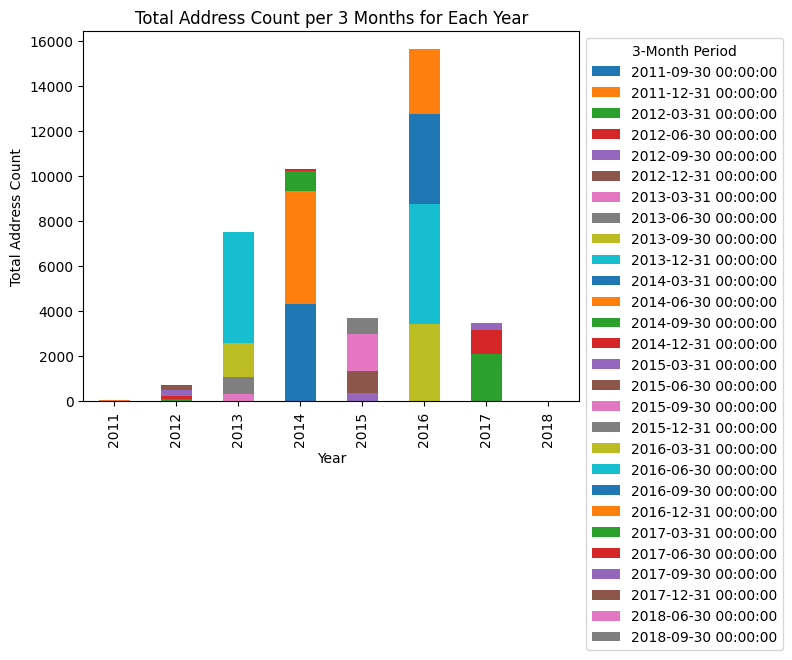

In [36]:
# Group the data by year and 3-month periods, then count all addresses
address_counts = ransomware_address.groupby([ransomware_address['date'].dt.year, pd.Grouper(key='date', freq='3M')])['address'].count()

print(address_counts)
# Unstack the multi-index to get 3-month periods as columns
address_counts = address_counts.unstack()

# Plot the data
address_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Total Address Count')
plt.title('Total Address Count per 3 Months for Each Year')
plt.legend(title='3-Month Period', bbox_to_anchor=(1, 1))
plt.show()

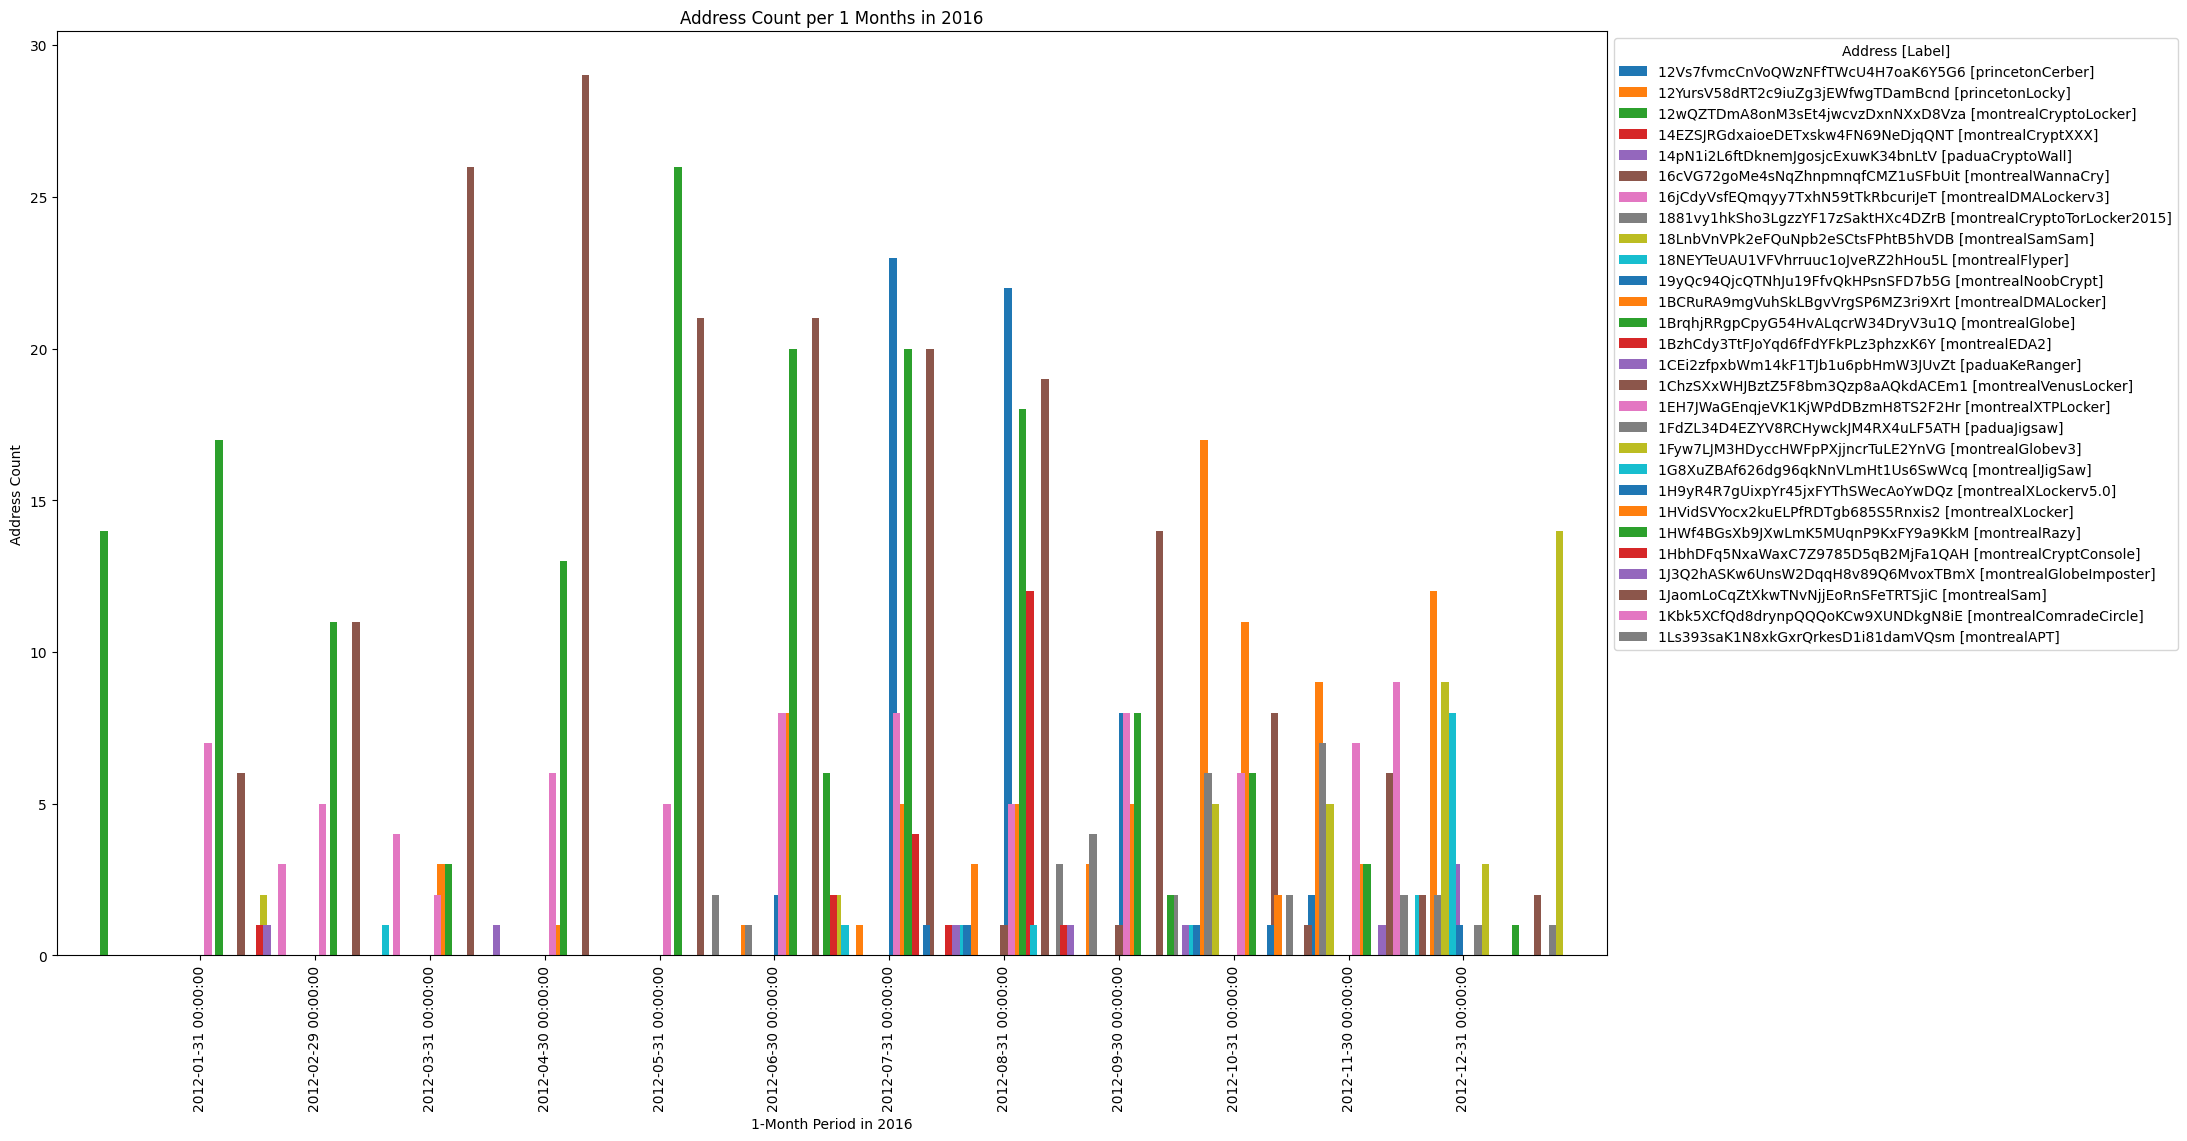

In [68]:
# Filter data for the year 2016
df_2016 = ransomware_address[ransomware_address['year'] == 2012]

address_counts_2016 = df_2016.groupby([pd.Grouper(key='date', freq='1M'), 'address']).size().unstack(fill_value=0)

# Plot the data
ax = address_counts_2016.plot(kind='bar', stacked=False, figsize=(20, 12), width=2)
plt.xlabel('1-Month Period in 2016')
plt.ylabel('Address Count')
plt.title('Address Count per 1 Months in 2016')

# Create a legend with addresses and labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = ransomware_address['label'].unique()
legend_labels = [f'{address} [{label}]' for address, label in zip(labels, unique_labels)]

# Show legend with addresses and labels
plt.legend(handles, legend_labels, title='Address [Label]', bbox_to_anchor=(1, 1))
plt.show()

#  Model Traning
### Bidirectional Long Short-Term Memory

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Embedding, Flatten

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Embedding, Flatten

# Assuming 'X' contains your features and 'y' contains the labels
X = df[['year', 'day']]  # Adjust columns as needed
y = df['label']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert labels to numerical values
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y = y.map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM input (assuming time steps=1)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(len(label_mapping), activation='softmax'))  # Use 'softmax' for multiclass classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Epoch 1/10
58334/58334 [==============================] - 467s 8ms/step - loss: 0.0812 - accuracy: 0.9856 - val_loss: 0.0701 - val_accuracy: 0.9859
Epoch 2/10
58334/58334 [==============================] - 457s 8ms/step - loss: 0.0716 - accuracy: 0.9857 - val_loss: 0.0689 - val_accuracy: 0.9859
Epoch 3/10
58334/58334 [==============================] - 495s 8ms/step - loss: 0.0708 - accuracy: 0.9857 - val_loss: 0.0687 - val_accuracy: 0.9859
Epoch 4/10
58334/58334 [==============================] - 459s 8ms/step - loss: 0.0706 - accuracy: 0.9857 - val_loss: 0.0685 - val_accuracy: 0.9859
Epoch 5/10
58334/58334 [==============================] - 495s 8ms/step - loss: 0.0704 - accuracy: 0.9857 - val_loss: 0.0683 - val_accuracy: 0.9859
Epoch 6/10
58334/58334 [==============================] - 476s 8ms/step - loss: 0.0703 - accuracy: 0.9857 - val_loss: 0.0685 - val_accuracy: 0.9859
Epoch 7/10
58334/58334 [==============================] - 458s 8ms/step - loss: 0.0702 - accuracy: 0.9857 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9861093016079816
Precision: 0.9724115547177812
Recall: 0.9861093016079816
F1 Score: 0.9792125276594832
